In [1]:
from fpm import *
from params import *
import pandas as pd
import numpy as np
import torch
import scipy.io as io
import cv2

from utils import get_label


Windows Deploy

In [2]:
models = {
    '64_raw': ('models/frcnn_64_raw', False),
    '64_pre': ('models/frcnn_64_pre', True),
    '128_raw': ('models/frcnn_128_raw', False),
    '128_pre': ('models/frcnn_128_pre', True),
    '256_raw': ('models/frcnn_256_raw', False),
    '256_pre': ('models/frcnn_256_pre', True),
    '512_raw': ('models/frcnn_512_raw', False),
    '512_pre': ('models/frcnn_512_pre', True),
    'multisize_raw': ('models/frcnn_multisize_raw', False),
}

models_loaded = {
    '64_raw': 0,
    '64_pre': 0,
    '128_raw': 0,
    '128_pre': 0,
    '256_raw': 0,
    '256_pre': 0,
    '512_raw': 0,
    '512_pre': 0,
    'multisize_raw': 0,
}


In [3]:
model = '64_raw'

cfg_path, preprocess_fft = models[model]
cfg = pickle.load(open(os.path.join(cfg_path, 'cfg.pkl'), 'rb'))
cfg.MODEL.WEIGHTS = os.path.join(cfg_path, 'model_final.pth')
predictor = Predictor(cfg, preprocess_fft=preprocess_fft)

KeyError: "No object named 'GeneralizedRCNN' found in 'META_ARCH' registry!"

In [4]:
tiff_path = '4.2.03.tiff'
img = read_tiff(tiff_path)[0]
img = torch.from_numpy(img).cuda()
img = [
    {
        'image': img,
    }
]
predictor.model(img)[0]['instances']

Instances(num_instances=3, image_height=512, image_width=512, fields=[pred_boxes: Boxes(tensor([[ 43.5865, 106.6664, 453.1244, 472.1649],
        [ 45.2412,  17.2364, 394.0081, 359.3080],
        [167.4072,  35.8125, 478.4728, 384.9897]], device='cuda:0',
       grad_fn=<IndexBackward>)), scores: tensor([0.9712, 0.7919, 0.4977], device='cuda:0', grad_fn=<IndexBackward>), pred_classes: tensor([0, 0, 0], device='cuda:0')])

In [23]:
torch.save(predictor, open('test.pkl', 'wb'))

In [24]:
torch.save(predictor.model, open('test2.pkl', 'wb'))

In [25]:
??predictor.model

### An example tun-through of the available functions

In [ ]:
tiff_path = '4.2.03.tiff'
df = pd.read_csv('~/Eval-FPM/data_512/labels.csv')
row = get_label(f'data_512/images/4.2.03.tiff', df, return_row=True)
illumination_params['model'] = '128_raw'
reconstruction_params['scale'] = 2
illumination_params['calibrate'] = False

# Illumination Estimation
discs, radii = get_illumination(tiff_path, **illumination_params)

# Save Illumination Estimation Results
save_illumination(discs, radii, tiff_path, save_params)

# Reconstruction
obj, pupil, imgs = get_reconstruction(tiff_path, discs, row, reconstruction_params)

# Save Reconstruction Results
save_reconstruction(obj, pupil, imgs, tiff_path, save_params)

Loading the model...

In [105]:
tiff_path = '4.2.03_64.tiff'
df = pd.read_csv('~/Eval-FPM/data_512/labels.csv')
row = get_label(f'data_512/images/4.2.03.tiff', df, return_row=True)
row['IMAGESIZE'] = 64
illumination_params['do_psd'] = True
illumination_params['visualize'] = False
illumination_params['model'] = '64_pre'

reconstruction_params['do_psd'] = False
reconstruction_params['window'] = 'tukey'
reconstruction_params['a'] = 0.25
reconstruction_params['n_iters'] = 40

# Illumination Estimation
discs, radii = get_illumination(tiff_path, **illumination_params)

# Save Illumination Estimation Results
# save_illumination(discs, radii, tiff_path, save_params)

# Reconstruction
obj, pupil, imgs = get_reconstruction(tiff_path, discs, row, reconstruction_params)

# Save Reconstruction Results
# save_reconstruction(obj, pupil, imgs, tiff_path, save_params)

/home/suyog_jadhav1_gmail_com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Loading the model...Done!


Performing Reconstruction...

Done!


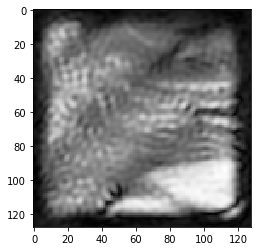

In [106]:
plt.imshow(cp.asnumpy(cp.abs(obj)))

In [107]:
# Save Illumination Estimation Results
save_illumination(discs, radii, tiff_path, save_params)

# Save Reconstruction Results
save_reconstruction(obj, pupil, imgs, tiff_path, save_params)

Saving illumination results...Done!
Saving reconstruction results...Done!


### Study 3 Figure

In [113]:
imgs = read_tiff('4.2.03.tiff')
imgs_64 = read_tiff('4.2.03_64.tiff')

# imgs_p = preprocess(imgs, return_rgb=True)
# disc_p = imgs_p[2]
# d_p = io.loadmat('illumination/512_pre.mat')['discs'].squeeze()[2][0]
# r_p = io.loadmat('illumination/512_pre.mat')['radii'].squeeze()[2]
# mask = disc_p.copy()
# mask = cv2.circle(mask, (int(d_p[0]), int(d_p[1])), int(r_p), (0, 0, 255), -1)
# disc_p = cv2.addWeighted(disc_p, 0.6, mask, 0.4, 1)

# imgs_p = preprocess(imgs, return_rgb=True, preprocess_fft=False)
# disc = imgs_p[2]
# d = io.loadmat('illumination/512_raw.mat')['discs'].squeeze()[2][0]
# r = io.loadmat('illumination/512_raw.mat')['radii'].squeeze()[2]
# mask = disc.copy()
# mask = cv2.circle(mask, (int(d[0]), int(d[1])), int(r), (0, 0, 255), -1)
# disc = cv2.addWeighted(disc, 0.6, mask, 0.4, 1)

# imgs_64_p = preprocess(imgs_64, return_rgb=True)
# disc_64_p = imgs_64_p[2]
# d_64_p = io.loadmat('illumination/64_pre.mat')['discs'].squeeze()[2]
# r_64_p = io.loadmat('illumination/64_pre.mat')['radii'].squeeze()[2]
# mask = disc_64_p.copy()
# mask = cv2.circle(mask, (int(d_64_p[0]), int(d_64_p[1])), int(r_64_p), (0, 0, 255), -1)
# disc_64_p = cv2.addWeighted(disc_64_p, 0.6, mask, 0.4, 1)

# imgs_64_p = preprocess(imgs_64, return_rgb=True, preprocess_fft=False)
# disc_64 = imgs_64_p[2]
# d_64 = io.loadmat('illumination/64_raw.mat')['discs'].squeeze()[2]
# r_64 = io.loadmat('illumination/64_raw.mat')['radii'].squeeze()[2]
# mask = disc_64.copy()
# mask = cv2.circle(mask, (int(d_64[0]), int(d_64[1])), int(r_64), (0, 0, 255), -1)
# disc_64 = cv2.addWeighted(disc_64, 0.6, mask, 0.4, 1)


In [111]:
rec = cv2.imread('reconstruction/512_raw.png')
rec_p = cv2.imread('reconstruction/512_pre.png')
rec_64 = cv2.imread('reconstruction/64_raw.png')
rec_64_p = cv2.imread('reconstruction/64_pre.png')

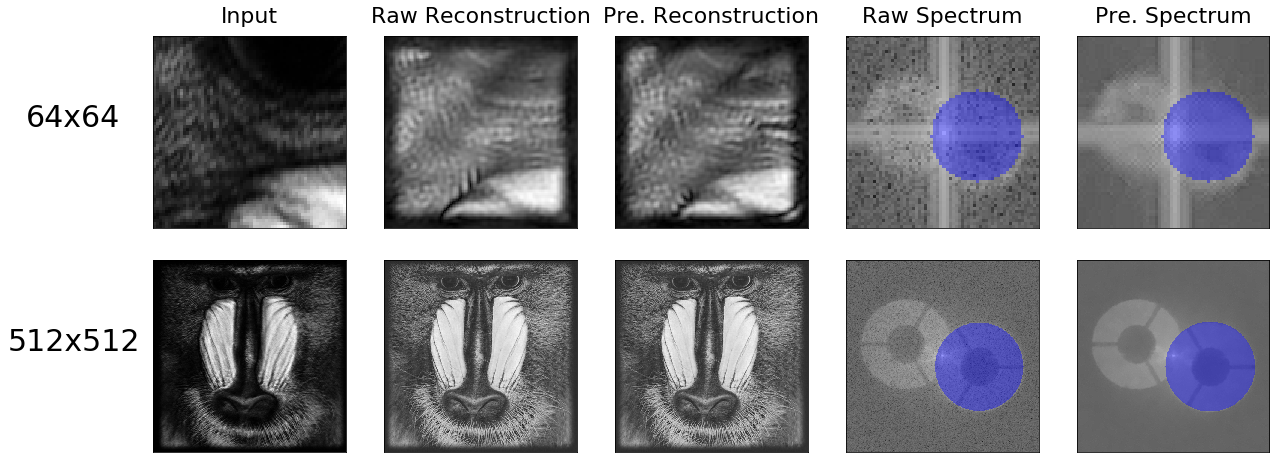

In [141]:
def opts():
    plt.xticks([])
    plt.yticks([])

def title(t, **kwargs):
    plt.title(t, fontdict = {'fontsize' : 22}, y=1.04, **kwargs)

scale = 5
fig = plt.figure(figsize=(4 * scale, 2 * scale))
plt.tight_layout()

plt.subplot(251)
opts(); title('Input'); plt.ylabel('64x64', rotation=0, fontdict = {'fontsize' : 30}, labelpad=80)
plt.imshow(imgs_64[2], interpolation='none')

plt.subplot(252)
opts(); title('Raw Reconstruction')
plt.imshow(rec_64, interpolation='none')

plt.subplot(253)
opts(); title('Pre. Reconstruction')
plt.imshow(rec_64_p, interpolation='none')

plt.subplot(254)
opts(); title('Raw Spectrum')
plt.imshow(disc_64, interpolation='none')

plt.subplot(255)
opts(); title('Pre. Spectrum')
plt.imshow(disc_64_p, interpolation='none')


plt.subplot(256)
plt.ylabel('512x512', rotation=0, fontdict = {'fontsize' : 30}, labelpad=80)
opts(); #title('Input') #, y=-0.2)
plt.imshow(imgs[2], interpolation='none')

plt.subplot(257)
opts(); #title('Raw Reconstruction') #, y=-0.2)
plt.imshow(rec, interpolation='none')

plt.subplot(258)
opts(); #title('Pre. Reconstruction') #, y=-0.2)
plt.imshow(rec_p, interpolation='none')

plt.subplot(259)
opts(); #title('Raw Spectrum') #, y=-0.2)
plt.imshow(disc, interpolation='none')

plt.subplot(2, 5, 10)
opts(); #title('Pre. Spectrum') #, y=-0.2)
plt.imshow(disc_p, interpolation='none')

fig.subplots_adjust(hspace=-0.3)
plt.show()

# Scratchpad

In [3]:
import os
import pickle
import numpy as np
import cupy as cp
from tqdm.auto import tqdm
from scipy import signal
from scipy.signal import general_gaussian
from psd import periodic_smooth_decomp as psd
from utils import *
from fpm_utils import *

In [4]:
models = {
    '64_raw': ('models/frcnn_64_raw', False),
    '64_pre': ('models/frcnn_64_pre', True),
    '128_raw': ('models/frcnn_128_raw', False),
    '128_pre': ('models/frcnn_128_pre', True),
    '256_raw': ('models/frcnn_256_raw', False),
    '256_pre': ('models/frcnn_256_pre', True),
    '512_raw': ('models/frcnn_512_raw', False),
    '512_pre': ('models/frcnn_512_pre', True),
    'multisize_raw': ('models/frcnn_multisize_raw', False),
}

def get_illumination(tiff_path, model='multisize_raw', window='tukey', a=0.3, p=10, sig=230, do_psd=True, starting_angle=0, increase_angle=True, visualize=False, calibrate=True, fill_empty=True, tol='auto'):
    """
    get_illumination(model)
    
    Parameters
    ----------
    `tiff_path`: String, Required.
            Path to the tiff file.
    `model`: String, Optional.
        Which model to use. Defaults to multisize_raw. Currently available: 
        ['64_raw', '64_pre', '128_raw', '128_pre', '256_raw', '256_pre', '512_raw', '512_pre', 'multisize_raw']
    `window`: String, Optional
        Which window to use for apodization before estimating illumination. Defaults to 'tukey'.
        Available options: ['gaussian', 'tukey', None]
    `a, p, sig`: Floats, optional
        Window parameters. `a` is alpha used for generating tukey window.
        `p` and `sig` are used for gaussian window.
    `do_psd`: Boolean, Optional
        Whether to perform periodic smooth decomposition before estimating illumination.
        Helps in removing artifacts. Defaults to True.
    `starting_angle`: Float, Optional
        If the starting angle is not at 0 degrees measured clockwise from +x axis, change this to whatever the starting angle is in degrees.
        Must be a positive value between 0-360.
    `increase_angle`: Boolean, Optional
        Defaults to True. If the clockwise angle from +x axis does not go on increasing with frame no., set this to False.
    `visualize`: Boolean, Optional
        Defaults to False. Whether to visualize te disc locations using a matplotlib plot.
    `calibrate`: Boolean, Optional
        Defaults to True. Whether to use calibration or not. 
    `fill_empty`: Boolean, Optional
        Defaults to True. Whether to fill frames that have no detection with estimated disc locations. 
    `tol`: String, Optional
        Defaults to 'auto'. Tolerance value for rejecting wrong detections. If set to None or 'none', does not reject any detection.
    
    """
    
    assert model in models.keys(), "The model must be in the format {size}_{raw/pre}. For example:"\
    " 128_pre for model trained on 128x128 preprocessed frames. Available models:\n"\
    f"{models.keys()}"
    
    # Load the model
    print('Loading the model...', end='')
    cfg_path, preprocess_fft = models[model]
    cfg = pickle.load(open(os.path.join(cfg_path, 'cfg.pkl'), 'rb'))
    cfg.MODEL.WEIGHTS = os.path.join(cfg_path, 'model_final.pth')
    predictor = Predictor(cfg, preprocess_fft=preprocess_fft)
    print('Done!')
    
    # Read the tiff file
    imgs = read_tiff(tiff_path)
    
    if imgs[0].shape[0] != imgs[0].shape[1]:
        print('The input image is not square. The image will be cropped to be a*a where `a` is the smallest dimension.')
        a = min(imgs[0].shape[0], imgs[0].shape[1])
        slice_x, slice_y = slice(0, a), slice(0, a)
        imgs = [img[slice_x, slice_y] for img in imgs]

    width, height = imgs[0].shape  # Images aren't supposed to have 3rd dimension
    
    # Apodization
    if window.lower()=='gaussian':
        w = np.outer(signal.general_gaussian(512, p=p, sig=sig), signal.general_gaussian(512, p=p, sig=sig))
    elif window.lower()=='tukey':
        w = np.outer(signal.tukey(width, alpha=a), signal.tukey(height, alpha=a))
    elif window is None or window.lower() is 'none':
        w=1

    imgs = [w*img for img in tqdm(imgs, desc='Processing Apodization', leave=False)]
    
    # Periodic Smooth Decomposition
    if do_psd:
        imgs = [psd(img)[0] for img in tqdm(imgs, desc='Processing PSD', leave=False)]
    
    # Figure out idxs
    if (starting_angle == 0) and increase_angle:  # The default case
        idxs = None
    else:
        thetas = list(np.arange(0, 360, 360/39))
        offset = int((starting_angle / 360) * len(imgs))  # Calculate offset index
        if increase_angle:  # If angle increasing in CW direction
            thetas_ = thetas[offset:] + thetas[:offset]
            idxs = [thetas.index(t) for t in thetas_]
        else:
            thetas_ = thetas[offset::-1] + thetas[- (len(imgs) - offset -1):][::-1]
            idxs = [thetas.index(t) for t in thetas_]
    
    # Estimate illumination
    try:
        discs, radii = predictor.get_disc(
            tiff_path=imgs,
            visualize=visualize,
            warnings=False,
            calibrate=calibrate,
            fill_empty=fill_empty,
            idxs=idxs,
            tol=tol
        )
        
        return discs, radii
    
    except IndexError:
        print(
            'The model did not return any detections.'\
            ' Check to make sure the arguments starting_angle and increase_angle are set correctly.'\
            'You can also try changing the model, changing windowing method, turn PSD on/off, set tol to None, etc. to see if it helps.'
         )
        
        return None, None

In [5]:
pa={'starting_angle':270}
discs, radii = get_illumination('../wl450nm_Illu0.55NA_obj065NA_obscuration_mag109x_pxl11um_9.5deg.tif', **pa)

Loading the model...Done!
The input image is not square. The image will be cropped to be a*a where `a` is the smallest dimension.


In [7]:
tiff_path = '../wl450nm_Illu0.55NA_obj065NA_obscuration_mag109x_pxl11um_9.5deg.tif'

# Read the tiff file
imgs = read_tiff(tiff_path)

if imgs[0].shape[0] != imgs[0].shape[1]:
    print('The input image is not square. The image will be cropped to be a*a where `a` is the smallest dimension.')
    a = min(imgs[0].shape[0], imgs[0].shape[1])
    slice_x, slice_y = slice(0, a), slice(0, a)
    imgs = [img[slice_x, slice_y] for img in imgs]

imgs = [cp.array(img) for img in imgs]

IMAGESIZE = imgs[0].shape[0]
# scale = reconstruction_params['scale']
scale = 2
hres_size = (IMAGESIZE * scale, IMAGESIZE * scale)


row = pd.DataFrame(  # Metadata
    {  # DO NOT remove square brackets. They are needed for correct interpretation.
        'NA': [0.65],
        'PIXELSIZE': [11],  # um
        'RI': [1.8],
        'WAVELENGTH': [0.450],  # um
        'IMAGESIZE': [512],  # In case of non-square images, put lesser of the two dimensions here
        'MAGNIFICATION': [100],
        
         # Not used for real-life data. Left here for compatibility with old code. Does not need to be changed
        'ILLUMINATION_OFFCENTER_X': [0],
        'ILLUMINATION_OFFCENTER_Y': [0],
        'FRAMES': [0]
    }
)


scale=2
n_iters = 10
do_fil = False
denoise = False
crop_our_way = True
plot = False
adaptive_noise = 1
adaptive_pupil = 1
adaptive_img = 1 
alpha = 1
# delta_img, delta_pupil = 0.1, 1e-6
delta_img, delta_pupil = 10, 1e-4
calibrate_freq_pos=True
eps = 1e-9

obj, pupil = reconstruct_v2(
    imgs,
    discs,
    row,
    hres_size,
    n_iters=n_iters,
    do_fil=do_fil,
    denoise=denoise,
    crop_our_way=crop_our_way,
    plot=plot,
    adaptive_noise=adaptive_noise,
    adaptive_pupil=adaptive_pupil,
    adaptive_img=adaptive_img,
    alpha=alpha,
    delta_img=delta_img,
    delta_pupil=delta_pupil,
    calibrate_freq_pos=calibrate_freq_pos,
    eps=eps,
)

The input image is not square. The image will be cropped to be a*a where `a` is the smallest dimension.


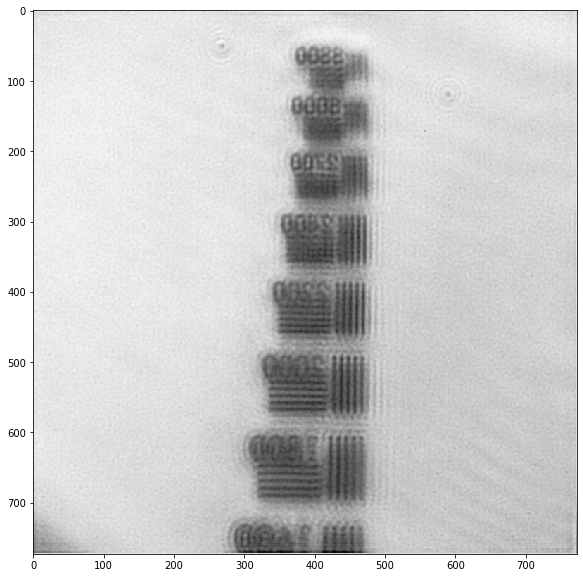

In [9]:
os.makedirs(f'recs/{file}', exist_ok=True)
plt.imshow(cp.asnumpy(cp.abs(obj)))
im = cp.asnumpy(to_uint8(cp.abs(o)))
f = f'recs/{file}/amp.png'

i = 1
while os.path.exists(f):
    f = f'recs/{file}/amp_{i}.png'
    i += 1

cv2.imwrite(f, im)

# Errors

In [2]:
%cd ~/Eval-FPM

/home/suyog_jadhav1_gmail_com/Eval-FPM


In [3]:
import os
import glob
import pickle
import pandas as pd
import re

In [146]:
folder, size, t = 'data', 64, 'raw'
pickle.load(open(f'errors/{folder}_{size}/{t}/mae_delta.pkl', 'rb'))['um']

[0.8494895692192101,
 1.0728748366271128,
 1.332230602256615,
 0.5328287755388145,
 0.8526791430365884,
 0.7229210668080227,
 0.49246867753776274,
 0.5765885205204885,
 1.612310414219209,
 1.1914179034192098,
 0.8704648243286223,
 1.445040560156374,
 0.738231183370188,
 0.5611879501084026,
 0.6551595999192331,
 0.7209518421831833,
 0.8350884121012347,
 0.6037965759329214,
 1.964529222621257]

In [5]:
def pad(arr):
    p = 60 - len(arr)
    return np.pad(arr, ((0, p)))


In [230]:
errors_um = {}
for folder in tqdm(['data', 'brightfield/data', 'brightfield2/data']):
    errors_um[folder] = {}
    for size in tqdm([64, 128, 256, 512], leave=False):
        for t in tqdm(['raw', 'preprocessed'], leave=False):
            mae_delta = pickle.load(open(f'errors_complete/{folder}_{size}/{t}/mae_delta.pkl', 'rb'))['um']
            mae_r = pickle.load(open(f'errors_complete/{folder}_{size}/{t}/mae_r.pkl', 'rb'))['um']
            mae_delta_x = pickle.load(open(f'errors_complete/{folder}_{size}/{t}/mae_delta_x.pkl', 'rb'))['um']
            mae_delta_y = pickle.load(open(f'errors_complete/{folder}_{size}/{t}/mae_delta_y.pkl', 'rb'))['um']
            
            if folder == 'data':
                mae_delta = [pad(m) for m in mae_delta]
                mae_r = [pad(m) for m in mae_r]
                mae_delta_x = [pad(m) for m in mae_delta_x]
                mae_delta_y = [pad(m) for m in mae_delta_y]
            
            errors_um[folder][f'{size}_{t}'] = {
                'mae_delta': np.array(mae_delta).ravel().squeeze().tolist(),
                'mae_r': np.array(mae_r).ravel().squeeze().tolist(),
                'mae_delta_x': np.array(mae_delta_x).ravel().squeeze().tolist(),
                'mae_delta_y': np.array(mae_delta_y).ravel().squeeze().tolist(),
            }

data1

In [231]:
df1 = pd.DataFrame(errors_um['brightfield/data']).transpose()
for col in ['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y']:
    df1[[f'{col}_{i}' for i in range(1900)]] = pd.DataFrame(df1[col].tolist(), index=df1.index)
    
df1.drop(columns=['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y'], inplace=True)

In [40]:
# df1.to_csv('data1_errors_complete.csv', index=False)

data2

In [232]:
df2 = pd.DataFrame(errors_um['data']).transpose()
for col in ['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y']:
    df2[[f'{col}_{i}' for i in range(1140)]] = pd.DataFrame(df2[col].tolist(), index=df2.index)
    
df2.drop(columns=['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y'], inplace=True)

In [ ]:
# df2.to_csv('data2_errors_complete.csv', index=False)

data3

In [233]:
df3 = pd.DataFrame(errors_um['brightfield2/data']).transpose()
for col in ['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y']:
    df3[[f'{col}_{i}' for i in range(1140)]] = pd.DataFrame(df3[col].tolist(), index=df3.index)
    
df3.drop(columns=['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y'], inplace=True)

In [42]:
# df3.to_csv('data3_errors_complete.csv', index=False)

Eckert-Errors

In [241]:
errors_um = {}
for folder in tqdm(['data', 'brightfield/data', 'brightfield2/data']):
    errors_um[folder] = {}
    for size in tqdm([64, 128, 256, 512], leave=False):
        for t in tqdm(['RemoveOut', 'noRemoveOut'], leave=False):
            errors_um[folder][f'{size}_{t}'] = {
                'mae_delta': np.array(pickle.load(open(f'eckert-errors-complete/{folder}_{size}/{t}/mae_delta.pkl', 'rb'))['um']).ravel().squeeze().tolist(),
                'mae_r': np.array(pickle.load(open(f'eckert-errors-complete/{folder}_{size}/{t}/mae_r.pkl', 'rb'))['um']).ravel().squeeze().tolist(),
                'mae_delta_x': np.array(pickle.load(open(f'eckert-errors-complete/{folder}_{size}/{t}/mae_delta_x.pkl', 'rb'))['um']).ravel().squeeze().tolist(),
                'mae_delta_y': np.array(pickle.load(open(f'eckert-errors-complete/{folder}_{size}/{t}/mae_delta_y.pkl', 'rb'))['um']).ravel().squeeze().tolist(),
            }

data1

In [242]:
dfe1 = pd.DataFrame(errors_um['brightfield/data']).transpose()
for col in ['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y']:
    dfe1[[f'{col}_{i}' for i in range(1900)]] = pd.DataFrame(dfe1[col].tolist(), index=dfe1.index)
    
dfe1.drop(columns=['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y'], inplace=True)

In [48]:
# dfe1.to_csv('data1_eckert-errors-complete.csv', index=False)

data2

In [243]:
dfe2 = pd.DataFrame(errors_um['data']).transpose()
for col in ['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y']:
    dfe2[[f'{col}_{i}' for i in range(1140)]] = pd.DataFrame(dfe2[col].tolist(), index=dfe2.index)
    
dfe2.drop(columns=['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y'], inplace=True)

In [244]:
# dfe2.to_csv('data2_eckert-errors-complete.csv', index=False)

data3

In [245]:
dfe3 = pd.DataFrame(errors_um['brightfield2/data']).transpose()
for col in ['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y']:
    dfe3[[f'{col}_{i}' for i in range(1140)]] = pd.DataFrame(dfe3[col].tolist(), index=dfe3.index)
    
dfe3.drop(columns=['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y'], inplace=True)

In [246]:
# dfe3.to_csv('data3_eckert-errors-complete.csv', index=False)

Write Excel

In [247]:
writer = pd.ExcelWriter('errors-complete.xlsx', engine='xlsxwriter')

# Position the dataframes in the worksheet.
df1.to_excel(writer, sheet_name='FRCNN-Data1')
dfe1.to_excel(writer, sheet_name='Eckert-Data1')

df2.to_excel(writer, sheet_name='FRCNN-Data2')
dfe2.to_excel(writer, sheet_name='Eckert-Data2')

df3.to_excel(writer, sheet_name='FRCNN-Data3')
dfe3.to_excel(writer, sheet_name='Eckert-Data3')

writer.save()

#### In Pixels

In [6]:
errors_um = {}
for folder in tqdm(['data', 'brightfield/data', 'brightfield2/data']):
    errors_um[folder] = {}
    for size in tqdm([64, 128, 256, 512], leave=False):
        for t in tqdm(['raw', 'preprocessed'], leave=False):
            mae_delta = pickle.load(open(f'errors_complete/{folder}_{size}/{t}/mae_delta.pkl', 'rb'))['px']
            mae_r = pickle.load(open(f'errors_complete/{folder}_{size}/{t}/mae_r.pkl', 'rb'))['px']
            mae_delta_x = pickle.load(open(f'errors_complete/{folder}_{size}/{t}/mae_delta_x.pkl', 'rb'))['px']
            mae_delta_y = pickle.load(open(f'errors_complete/{folder}_{size}/{t}/mae_delta_y.pkl', 'rb'))['px']
            
            if folder == 'data':
                mae_delta = [pad(m) for m in mae_delta]
                mae_r = [pad(m) for m in mae_r]
                mae_delta_x = [pad(m) for m in mae_delta_x]
                mae_delta_y = [pad(m) for m in mae_delta_y]
            
            errors_um[folder][f'{size}_{t}'] = {
                'mae_delta': np.array(mae_delta).ravel().squeeze().tolist(),
                'mae_r': np.array(mae_r).ravel().squeeze().tolist(),
                'mae_delta_x': np.array(mae_delta_x).ravel().squeeze().tolist(),
                'mae_delta_y': np.array(mae_delta_y).ravel().squeeze().tolist(),
            }

data1

In [7]:
df1 = pd.DataFrame(errors_um['brightfield/data']).transpose()
for col in ['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y']:
    df1[[f'{col}_{i}' for i in range(1900)]] = pd.DataFrame(df1[col].tolist(), index=df1.index)
    
df1.drop(columns=['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y'], inplace=True)

In [8]:
df1.to_csv('data1_errors_px.csv', index=False)

data2

In [9]:
df2 = pd.DataFrame(errors_um['data']).transpose()
for col in ['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y']:
    df2[[f'{col}_{i}' for i in range(1140)]] = pd.DataFrame(df2[col].tolist(), index=df2.index)
    
df2.drop(columns=['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y'], inplace=True)

In [10]:
df2.to_csv('data2_errors_px.csv', index=False)

data3

In [11]:
df3 = pd.DataFrame(errors_um['brightfield2/data']).transpose()
for col in ['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y']:
    df3[[f'{col}_{i}' for i in range(1140)]] = pd.DataFrame(df3[col].tolist(), index=df3.index)
    
df3.drop(columns=['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y'], inplace=True)

In [12]:
df3.to_csv('data3_errors_px.csv', index=False)

Eckert-Errors

In [13]:
errors_um = {}
for folder in tqdm(['data', 'brightfield/data', 'brightfield2/data']):
    errors_um[folder] = {}
    for size in tqdm([64, 128, 256, 512], leave=False):
        for t in tqdm(['RemoveOut', 'noRemoveOut'], leave=False):
            errors_um[folder][f'{size}_{t}'] = {
                'mae_delta': np.array(pickle.load(open(f'eckert-errors-complete/{folder}_{size}/{t}/mae_delta.pkl', 'rb'))['px']).ravel().squeeze().tolist(),
                'mae_r': np.array(pickle.load(open(f'eckert-errors-complete/{folder}_{size}/{t}/mae_r.pkl', 'rb'))['px']).ravel().squeeze().tolist(),
                'mae_delta_x': np.array(pickle.load(open(f'eckert-errors-complete/{folder}_{size}/{t}/mae_delta_x.pkl', 'rb'))['px']).ravel().squeeze().tolist(),
                'mae_delta_y': np.array(pickle.load(open(f'eckert-errors-complete/{folder}_{size}/{t}/mae_delta_y.pkl', 'rb'))['px']).ravel().squeeze().tolist(),
            }

data1

In [14]:
dfe1 = pd.DataFrame(errors_um['brightfield/data']).transpose()
for col in ['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y']:
    dfe1[[f'{col}_{i}' for i in range(1900)]] = pd.DataFrame(dfe1[col].tolist(), index=dfe1.index)
    
dfe1.drop(columns=['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y'], inplace=True)

In [15]:
dfe1.to_csv('data1_eckert-errors-px.csv', index=False)

data2

In [16]:
dfe2 = pd.DataFrame(errors_um['data']).transpose()
for col in ['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y']:
    dfe2[[f'{col}_{i}' for i in range(1140)]] = pd.DataFrame(dfe2[col].tolist(), index=dfe2.index)
    
dfe2.drop(columns=['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y'], inplace=True)

In [17]:
dfe2.to_csv('data2_eckert-errors-px.csv', index=False)

data3

In [18]:
dfe3 = pd.DataFrame(errors_um['brightfield2/data']).transpose()
for col in ['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y']:
    dfe3[[f'{col}_{i}' for i in range(1140)]] = pd.DataFrame(dfe3[col].tolist(), index=dfe3.index)
    
dfe3.drop(columns=['mae_delta', 'mae_r', 'mae_delta_x', 'mae_delta_y'], inplace=True)

In [19]:
dfe3.to_csv('data3_eckert-errors-px.csv', index=False)

Write Excel

In [20]:
writer = pd.ExcelWriter('errors-complete-px.xlsx', engine='xlsxwriter')

# Position the dataframes in the worksheet.
df1.to_excel(writer, sheet_name='FRCNN-Data1')
dfe1.to_excel(writer, sheet_name='Eckert-Data1')

df2.to_excel(writer, sheet_name='FRCNN-Data2')
dfe2.to_excel(writer, sheet_name='Eckert-Data2')

df3.to_excel(writer, sheet_name='FRCNN-Data3')
dfe3.to_excel(writer, sheet_name='Eckert-Data3')

writer.save()